In [235]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('C:/Users/lmars/Documents/MIAA/Embedded Systems/Enmanuel/Recyclable-Materials-Classification-Arduino/Project/project.csv')

# Display the contents of the CSV file
# df.head()

# Shuffle the data
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Transparencia,giroscopio X,giroscopio Y,Vermelho,Verde,Azul,Branco,Label
0,84,391,442,13,10,10,27,'laminas de Madeira'
1,98,76,73,6,5,5,11,'Cortiça'
2,83,150,169,13,10,10,27,'laminas de Madeira'
3,457,323,259,2,2,2,7,'Super Bock Mini Vidro'
4,53,643,608,2,3,3,10,'Super Bock Zero%Alc Vidro'


Classification problem with label as the target

# Dataset Analysis

## Class balance and checking for missing values

In [236]:
# Verify Class balance
df['Label'].value_counts()  

Label
'Garrafa Agua 1.5L plastico Cheia'    842
'Laminas de Ferro'                    767
'Garrafa Agua 1.5L plastico vacia'    711
'Cortiça'                             657
'Cartao'                              574
'Super Bock Mini Vidro'               482
'N/A'                                 424
'Papel Branco'                        423
'laminas de Madeira'                  418
'Super Bock Zero%Alc Vidro'           352
Name: count, dtype: int64

In [237]:
# Check for missing values
df.isnull().sum()

Transparencia    0
giroscopio X     0
giroscopio Y     0
Vermelho         0
Verde            0
Azul             0
Branco           0
Label            0
dtype: int64

# Feature Engineering

## Combining RGBW values into color intensity ratios

Color Ratio = Color Channel / White

In [238]:
# # Combining RGBW values into color intensity ratios
# df["Red Ratio"] = df["Vermelho"] / df["Branco"]
# df["Green Ratio"] = df["Verde"] / df["Branco"]
# df["Blue Ratio"] = df["Azul"] / df["Branco"]

# # Display the contents of the CSV file
# df.head()

## Calculating magnetic magnitude

In [239]:
# Magnetic magnitude formula
def magnitude(x, y):
    return (x**2 + y**2)**0.5

df['Magnetic magnitude'] = magnitude(df['giroscopio X'], df['giroscopio Y']) 
df.head()

# Display Magnetic magnitude values between each label
df.groupby('Label')['Magnetic magnitude'].describe()

,count,mean,std,min,25%,50%,75%,max
Label,,,,,,,,
'Cartao',574.0,414.988765,298.517262,143.282937,215.837896,264.980180,539.689293,1124.770199
'Cortiça',657.0,390.431174,250.228729,53.712196,134.617978,356.721180,663.520912,884.602170
'Garrafa Agua 1.5L plastico Cheia',842.0,779.842052,343.809317,220.292987,454.152116,740.381658,1112.649974,1407.200057
'Garrafa Agua 1.5L plastico vacia',711.0,784.634262,275.231236,137.295302,588.919160,786.336442,947.330717,1417.763379
'Laminas de Ferro',767.0,573.054960,355.590769,0.000000,226.029395,566.443289,909.040972,1446.740474
'N/A',424.0,1251.330418,15.119417,1178.175284,1241.661790,1251.690457,1260.521321,1319.072780
'Papel Branco',423.0,631.590442,403.723796,175.931805,259.033675,468.530682,1059.375002,1298.691649
'Super Bock Mini Vidro',482.0,777.086043,290.575247,258.031006,552.608240,766.160816,884.544026,1428.474011
'Super Bock Zero%Alc Vidro',352.0,463.271442,358.447360,22.472205,86.927408,516.623654,795.431269,1191.039882


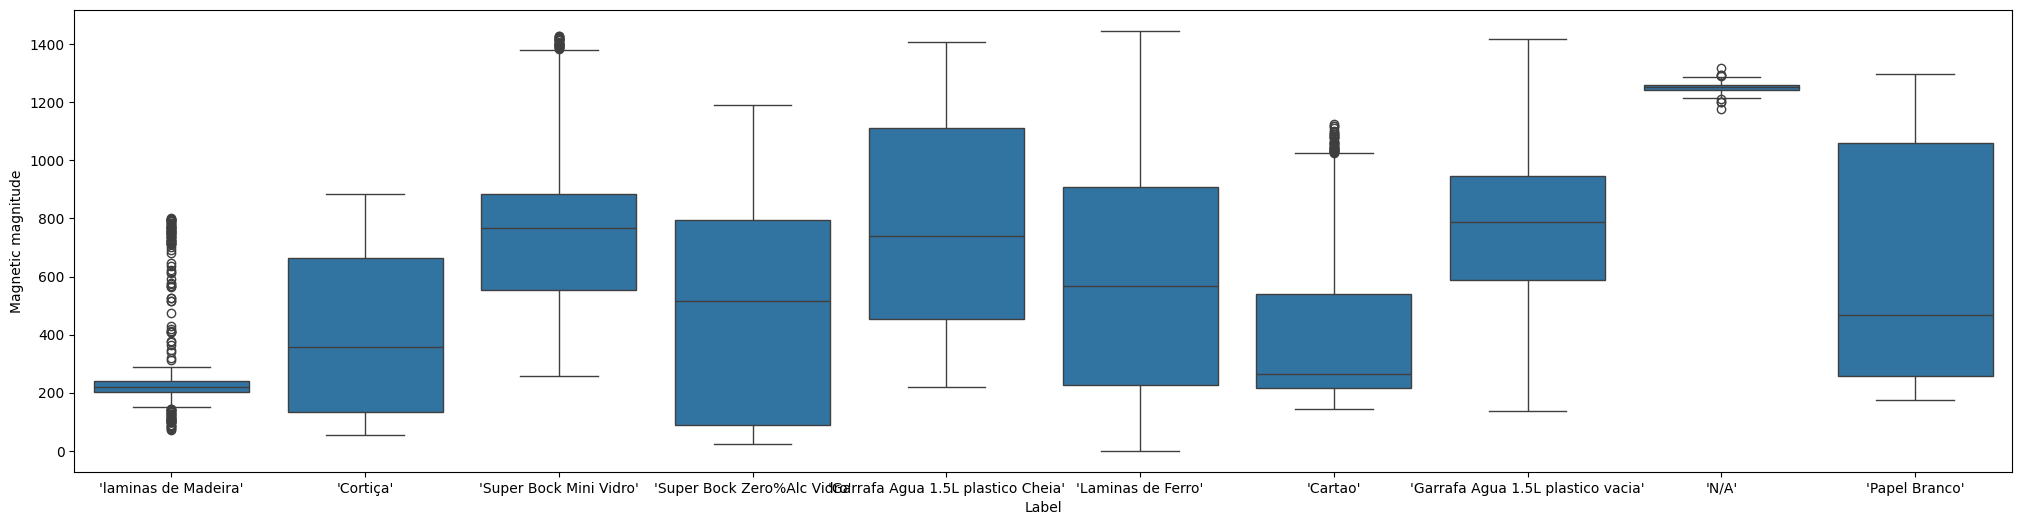

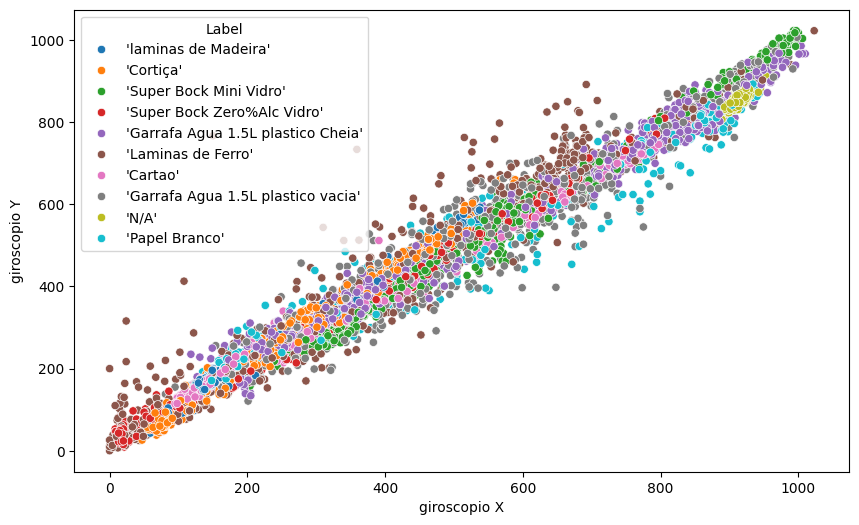

In [240]:
# EDA for the Magnetic magnitude feature for each label

import matplotlib.pyplot as plt
import seaborn as sns
    
plt.figure(figsize=(25, 6))
sns.boxplot(x='Label', y='Magnetic magnitude', data=df)
plt.show()

# scatterplot giroscope X vs giroscope Y
plt.figure(figsize=(10, 6))
sns.scatterplot(x='giroscopio X', y='giroscopio Y', hue='Label', data=df)
plt.show()



# Create transparency-color composite features

In [241]:
# # Create transparency-color composite features

# rgb_sum = df['Vermelho'] + df['Verde'] + df['Azul']

# # Transparency-Weighted Color Intensity
# # Transparency * (Color Channel / White Channel)
# # Transparency * Color Ratio
# df['T-Red'] = df['Transparencia'] * df['Red Ratio']
# df['T-Green'] = df['Transparencia'] * df['Green Ratio']
# df['T-Blue'] = df['Transparencia'] * df['Blue Ratio']

# # Transparency-Balanced Chromaticity
# df['Red Chroma'] = (df['Vermelho'] / (rgb_sum)) * df['Transparencia']
# df['Green Chroma'] = (df['Verde'] / (rgb_sum)) * df['Transparencia']
# df['Blue Chroma'] = (df['Azul'] / (rgb_sum)) * df['Transparencia']

# # Opacity-Color Contrast
# df['Contrast'] = df['Transparencia'] - (df['Branco'] / (rgb_sum + 1))


# df.head()

# Normalization

In [242]:
from sklearn.preprocessing import StandardScaler

features_to_scale = df.drop(columns=['Label']).columns   
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
df.head()

,Transparencia,giroscopio X,giroscopio Y,Vermelho,Verde,Azul,Branco,Label,Magnetic magnitude
0,-0.910627,-0.211696,-0.029077,1.762851,0.794177,0.693042,0.788780,'laminas de Madeira',-0.123805
1,-0.867886,-1.320956,-1.418696,0.056560,-0.230837,-0.298824,-0.471439,'Cortiça',-1.376199
2,-0.913680,-1.060368,-1.057169,1.762851,0.794177,0.693042,0.788780,'laminas de Madeira',-1.064648
3,0.228124,-0.451156,-0.718238,-0.918463,-0.845845,-0.893943,-0.786493,'Super Bock Mini Vidro',-0.578797
4,-1.005269,0.675711,0.596064,-0.918463,-0.640842,-0.695570,-0.550202,'Super Bock Zero%Alc Vidro',0.637884


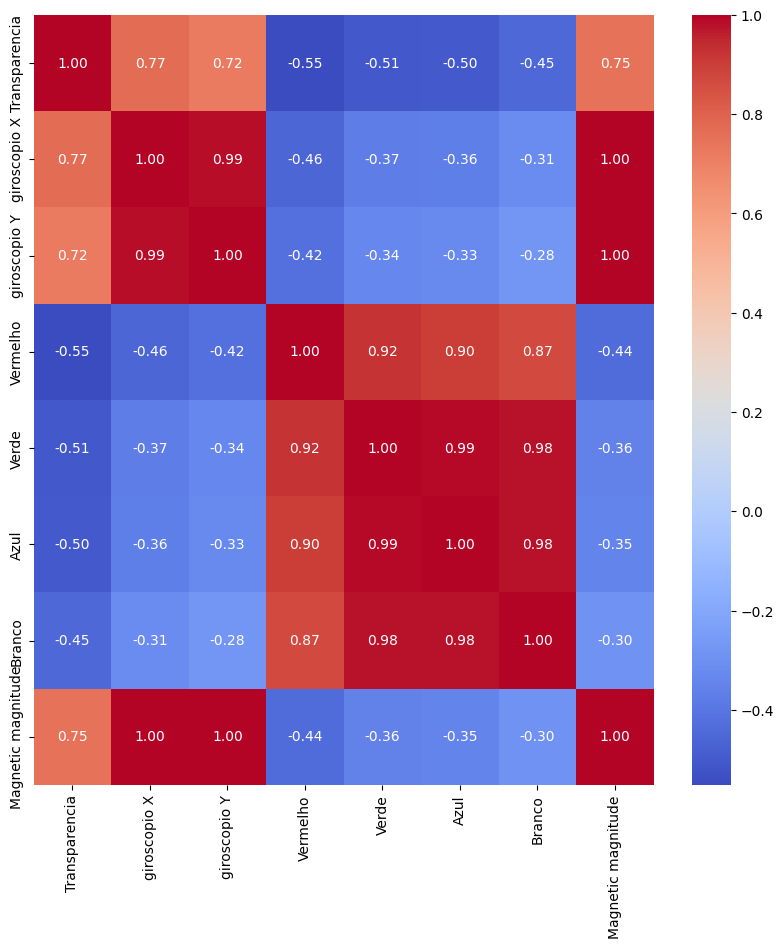

In [243]:
# Correlation matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

df_copy = df.copy().drop(columns=['Label'])

corr = df_copy.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Model Selection

Cross-val Accuracy: 0.88 (±0.01)
                                    precision    recall  f1-score   support

                          'Cartao'       0.96      0.93      0.95       114
                         'Cortiça'       0.99      1.00      0.99       139
'Garrafa Agua 1.5L plastico Cheia'       0.91      0.89      0.90       178
'Garrafa Agua 1.5L plastico vacia'       0.93      0.81      0.87       137
                'Laminas de Ferro'       0.89      0.83      0.86       151
                             'N/A'       0.85      0.97      0.91        69
                    'Papel Branco'       0.64      0.56      0.60        85
           'Super Bock Mini Vidro'       0.71      0.98      0.82       109
       'Super Bock Zero%Alc Vidro'       1.00      0.88      0.94        77
              'laminas de Madeira'       0.97      1.00      0.99        71

                          accuracy                           0.89      1130
                         macro avg       0.89      0.

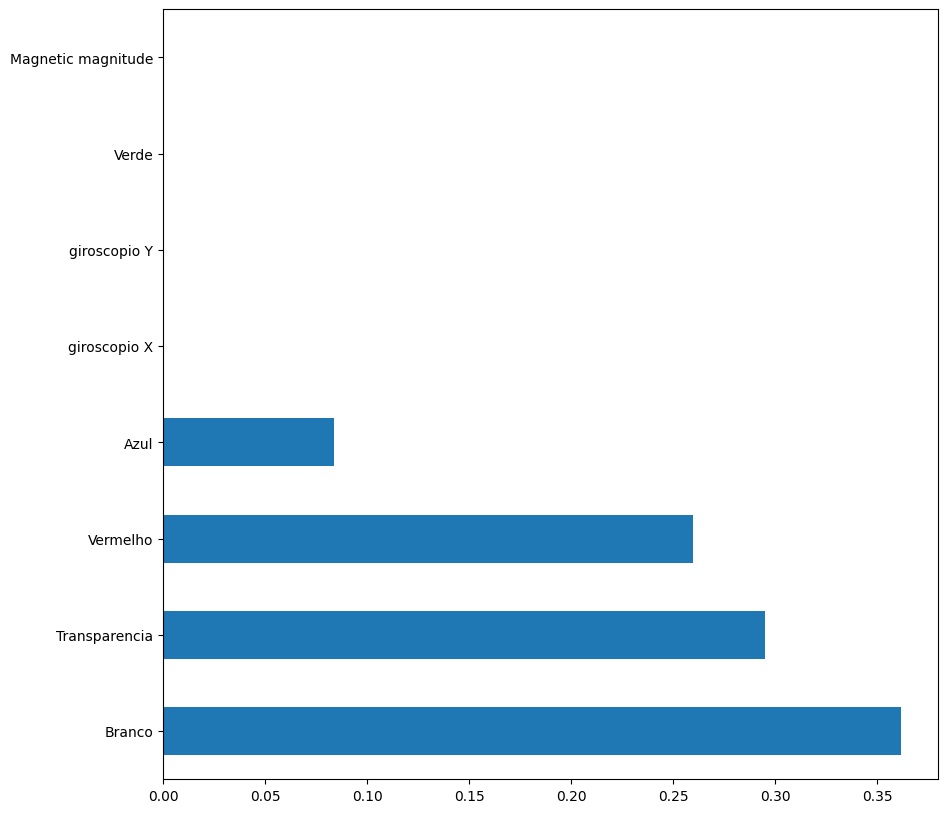

In [244]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Handle missing values by dropping rows with NaN values
df = df.dropna()

le = LabelEncoder()

df['Label'] = le.fit_transform(df['Label'])

X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# clf = DecisionTreeClassifier(random_state=42)
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_impurity_decrease=0.01, class_weight="balanced", random_state=42)

cv_scores = cross_val_score(clf, X, y, cv=5)
print(f"Cross-val Accuracy: {cv_scores.mean():.2f} (±{cv_scores.std():.2f})")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))

tree_rules = export_text(clf, feature_names=list(X.columns))
print("Decision Path:\n", tree_rules)

importance = pd.Series(clf.feature_importances_, index=X.columns)

# feature importance over 0.01
# importance = importance[importance > 0.01]

# plot feature importance
plt.figure(figsize=(10, 10))
importance.nlargest(20).plot(kind='barh')
plt.show()

Epoch 1/150


c:\Users\lmars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1855 - loss: 2.2958 - val_accuracy: 0.3257 - val_loss: 1.8402
Epoch 2/150
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3234 - loss: 1.7495 - val_accuracy: 0.4115 - val_loss: 1.4865
Epoch 3/150
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4820 - loss: 1.4005 - val_accuracy: 0.5531 - val_loss: 1.2661
Epoch 4/150
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5822 - loss: 1.2091 - val_accuracy: 0.5991 - val_loss: 1.1180
Epoch 5/150
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5877 - loss: 1.1025 - val_accuracy: 0.6310 - val_loss: 1.0045
Epoch 6/150
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6432 - loss: 0.9741 - val_accuracy: 0.6487 - val_loss: 0.9140
Epoch 7/150
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - loss: 0.8748 - val_accuracy: 0.6726 - val_loss: 0.8383
Epoch 8/150
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6717 - loss: 0.8384 - val_accuracy: 0.6903

INFO:tensorflow:Assets written to: C:\Users\lmars\AppData\Local\Temp\tmp034v2bhq\assets


Saved artifact at 'C:\Users\lmars\AppData\Local\Temp\tmp034v2bhq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='keras_tensor_28')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2771833117712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2772002815248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2772002814480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2772002815440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2772002815056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2772002815824: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model size: 3.0KB


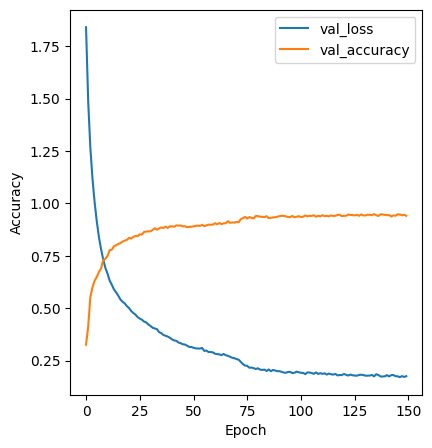

In [ ]:
import tensorflow as tf
import numpy as np

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=X_train.shape[1], input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(units=len(np.unique(y_train)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print(f"Model size: {len(tflite_model)/1024:.1f}KB")

# plot accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# save tf header
with open('model.h', 'w') as f:
    f.write(f"#define MODEL_TFLITE_SIZE {len(tflite_model)}\n")
    f.write(f"const unsigned char model_tflite[] = {str(list(tflite_model))};")
    


In [ ]:
# # Preprocess data
# # df = pd.read_csv('your_data.csv').dropna()
# from sklearn.calibration import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, f1_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report


# def train_and_evaluate_models(X, y, le):

#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=42
#     )

#     # Initialize the models
#     models = {
#         "Random Forest": RandomForestClassifier(),
#         "Logistic Regression": LogisticRegression(),
#         "SVM": SVC(),
#         "Naive Bayes": GaussianNB(),
#         "KNN": KNeighborsClassifier(),
#         "Decision Tree": DecisionTreeClassifier(),
#     }

#     # Train and evaluate the models
#     model_comparison = pd.DataFrame(
#         columns=["Model", "Train Accuracy", "Test Accuracy", "F1 Score"]
#     )
#     feature_importance = pd.DataFrame(columns=["Feature", "Importance"])

#     for model_name, model in models.items():
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)

#         train_accuracy = model.score(X_train, y_train)
#         test_accuracy = accuracy_score(y_test, y_pred)
#         f1 = f1_score(y_test, y_pred, average="weighted")

#         model_comparison = model_comparison.append(
#             {
#                 "Model": model_name,
#                 "Train Accuracy": train_accuracy,
#                 "Test Accuracy": test_accuracy,
#                 "F1 Score": f1,
#             },
#             ignore_index=True,
#         )

#         if model_name == "Random Forest":
#             feature_importance["Feature"] = X.columns
#             feature_importance["Importance"] = model.feature_importances_

#     return model_comparison, feature_importance


# le = LabelEncoder()
# df["Label"] = le.fit_transform(df["Label"])
# X = df.drop("Label", axis=1)
# y = df["Label"]

# # Execute training and evaluation
# model_comparison, feature_importance = train_and_evaluate_models(X, y, le)

# # Display results
# print("Model Performance Comparison:")
# print(model_comparison.sort_values("Test Accuracy", ascending=False))

# # Plot model metrics
# model_comparison[["Test Accuracy", "F1 Score"]].plot(kind="bar", figsize=(10, 6))
# plt.title("Model Performance Comparison")
# plt.ylabel("Score")
# plt.xticks(rotation=45)
# plt.show()

AttributeError: 'DataFrame' object has no attribute 'append'